In [1]:
%matplotlib inline

In [2]:
from fightingcv_attention.attention.SEAttention import SEAttention
import torch

input=torch.randn(50,512,7,7)
se = SEAttention(channel=512,reduction=8)
output=se(input)
print(output.shape)

torch.Size([50, 512, 7, 7])


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
from fightingcv_attention.attention.SimplifiedSelfAttention import SimplifiedScaledDotProductAttention

In [16]:
dataloader_train_moco

In [31]:
a = next(iter(dataloader_train_moco))

In [32]:
img = a[0][0]

In [33]:
img.shape

torch.Size([2, 3, 32, 32])

In [1]:
import os
import torch
import torch.nn as nn
import torchvision
import pytorch_lightning as pl
import lightly
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from PIL import Image
import numpy as np
import pandas
import copy

from lightly.models.modules.heads import MoCoProjectionHead
from lightly.models.utils import deactivate_requires_grad
from lightly.models.utils import update_momentum
from lightly.models.utils import batch_shuffle
from lightly.models.utils import batch_unshuffle

In [73]:
class CustomCollateFunction(nn.Module):

    def __init__(self, transform1: torchvision.transforms.Compose, transform2: torchvision.transforms.Compose):

        super(CustomCollateFunction, self).__init__()
        self.transform1 = transform1
        self.transform2 = transform2

    def forward(self, batch):
        batch_size = len(batch)

        # list of transformed images
        transform1 = self.transform1(batch)
        transform2 = self.transform2(batch)
        
        # list of labels
        labels = torch.LongTensor([item[1] for item in batch])
        # list of filenames
        fnames = [item[2] for item in batch]

        return (transform1, transform2), labels, fnames

In [14]:
example_image_name = 'airplane/0003.png'
example_image_path = os.path.join(path_to_train, example_image_name)
example_image = Image.open(example_image_path)

In [46]:
input_size = 32

transform1 = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.RandomVerticalFlip(p=0.5),
    torchvision.transforms.ToTensor(),
])

In [47]:
cj_prob = 0.8
cj_strength = 0.5
cj_bright=cj_strength * 0.8
cj_contrast=cj_strength * 0.8
cj_sat=cj_strength * 0.8
cj_hue=cj_strength * 0.2


color_jitter = torchvision.transforms.ColorJitter(cj_bright, cj_contrast, cj_sat, cj_hue)

transform2 = torchvision.transforms.Compose([
    torchvision.transforms.RandomApply([color_jitter], p=cj_prob), 
    torchvision.transforms.ToTensor()])

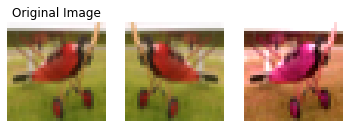

In [51]:
augmented_image_1 = transform1(example_image).numpy()
augmented_image_2 = transform2(example_image).numpy()

fig, axs = plt.subplots(1, 3)

axs[0].imshow(example_image)
axs[0].set_axis_off()
axs[0].set_title('Original Image')

axs[1].imshow(augmented_image_1.transpose([1,2,0]))
axs[1].set_axis_off()

axs[2].imshow(augmented_image_2.transpose([1,2,0]))
axs[2].set_axis_off()

In [24]:
transform(example_image).numpy().shape

(3, 32, 32)

In [67]:
a = torch.ones([2, 3, 32, 32])

In [68]:
a.shape

torch.Size([2, 3, 32, 32])

In [69]:
transform1(a)

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [ ]:
with torch.no_grad():
    for img, label, fnames in tqdm(dataloader_train_moco):
        img = img.to(device)
        break

  0%|                                                                                         | 0/1562 [00:00<?, ?it/s]

In [36]:
se = SEAttention(channel=3,reduction=2)

In [37]:
output=se(img)

In [38]:
output.shape

torch.Size([2, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


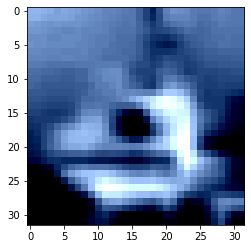

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


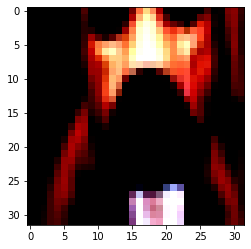

In [48]:
for a in img:
    a = a.cpu()
    b = a.numpy().transpose(1,2,0)
    plt.imshow(b)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([], grad_fn=<IndexBackward>)
tensor([1.0267, 1.0267, 1.0267, 1.0023, 1.2057, 1.2057, 1.2324, 1.2595, 1.2868,
        1.2868, 1.3144, 1.3423, 1.0541, 1.0541, 1.0795, 1.1053, 1.1314, 1.1314,
        1.1578, 1.1844, 1.0187, 1.0693, 1.1212, 1.1476, 1.0693])


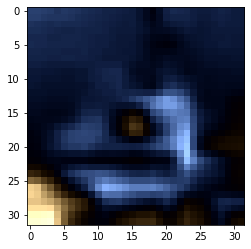

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([], grad_fn=<IndexBackward>)
tensor([1.0189, 1.1709, 1.0936, 1.1190, 1.2239, 1.1448, 1.1190, 1.1972, 1.1448,
        1.1448, 1.1972, 1.1972, 1.0435, 1.1190, 1.0189, 1.1709, 1.1190, 1.1709,
        1.2509, 1.1448, 1.0189, 1.0189, 1.1448, 1.1448, 1.1448, 1.1448, 1.3715,
        1.2877, 1.2877, 1.4000, 1.4000, 1.0030, 1.5170, 1.6079, 1.6387, 1.5773,
        1.4579, 1.0522, 1.4579, 1.5170, 1.5773, 1.4288, 1.3433, 1.0274, 1.3153,
        1.4873, 1.6387, 1.5170, 1.3433, 1.0522, 1.3433, 1.6079, 1.6699, 1.6079,
        1.3715, 1.0522, 1.3433, 1.6699, 1.7331, 1.6699, 1.4000, 1.0772, 1.0030,
        1.3715, 1.6387, 1.7014, 1.6079, 1.3715, 1.1280, 1.0274, 1.3715, 1.5773,
        1.6699, 1.5773, 1.4000, 1.1801, 1.0274, 1.3433, 1.5773, 1.6387, 1.5773,
        1.4873, 1.3153, 1.0522, 1.0772, 1.3153, 1.5773, 1.5773, 1.5773, 1.6079,
        1.4873, 1.2604, 1.0030, 1.2065, 1.3433, 1.3433, 1.6699, 1.6079, 1.6079,
        1.6699, 1.6387, 1.5470, 1.4579, 1.4873, 1.0772, 1.2604, 1.5170, 1.5170,
    

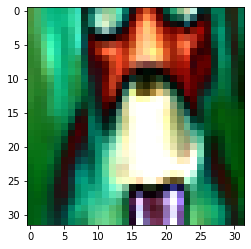

In [50]:
for a, at in zip(img, output):
    a *= at.detach().numpy()
    print(at[at>1])
    print(a[a>1])
    b = a.detach().numpy().transpose(1,2,0)
    plt.imshow(b)
    plt.show()

In [36]:
sa = SimplifiedScaledDotProductAttention(d_model=3, h=8)

In [37]:
sa_out = sa(img)

TypeError: forward() missing 2 required positional arguments: 'keys' and 'values'



# Tutorial 2: Train MoCo on CIFAR-10

In this tutorial, we will train a model based on the MoCo Paper
`Momentum Contrast for Unsupervised Visual Representation Learning <https://arxiv.org/abs/1911.05722>`_.

When training self-supervised models using contrastive loss we
usually face one big problem. To get good results, we need
many negative examples for the contrastive loss to work. Therefore,
we need a large batch size. However, not everyone has access to a cluster
full of GPUs or TPUs. To solve this problem, alternative approaches have been developed.
Some of them use a memory bank to store old negative examples we can query 
to compensate for the smaller batch size. MoCo takes this approach
one step further by including a momentum encoder.

We use the **CIFAR-10** dataset for this tutorial.

In this tutorial you will learn:

- How to use lightly to load a dataset and train a model

- How to create a MoCo model with a memory bank

- How to use the pre-trained model after self-supervised learning for a 
  transfer learning task


## Imports

Import the Python frameworks we need for this tutorial.
Make sure you have lightly installed.

.. code-block:: console

  pip install lightly



In [2]:
import torch
import torch.nn as nn
import torchvision
import pytorch_lightning as pl
import copy
import lightly
from tqdm import tqdm

from lightly.models.modules.heads import MoCoProjectionHead
from lightly.models.utils import deactivate_requires_grad
from lightly.models.utils import update_momentum
from lightly.models.utils import batch_shuffle
from lightly.models.utils import batch_unshuffle

import numpy as np
from matplotlib import pyplot as plt

## Configuration

We set some configuration parameters for our experiment.
Feel free to change them and analyze the effect.

The default configuration uses a batch size of 512. This requires around 6.4GB
of GPU memory.
When training for 100 epochs you should achieve around 73% test set accuracy.
When training for 200 epochs accuracy increases to about 80%.



In [3]:
num_workers = 8
batch_size = 32
memory_bank_size = 4096
seed = 1
max_epochs = 800

Replace the path with the location of your CIFAR-10 dataset.
We assume we have a train folder with subfolders
for each class and .png images inside.

You can download `CIFAR-10 in folders from Kaggle 
<https://www.kaggle.com/swaroopkml/cifar10-pngs-in-folders>`_.



In [4]:
# The dataset structure should be like this:
# cifar10/train/
#  L airplane/
#    L 10008_airplane.png
#    L ...
#  L automobile/
#  L bird/
#  L cat/
#  L deer/
#  L dog/
#  L frog/
#  L horse/
#  L ship/
#  L truck/
path_to_train = 'datasets/cifar10/train/'
path_to_test = 'datasets/cifar10/test/'

Let's set the seed to ensure reproducibility of the experiments



## Setup data augmentations and loaders

We start with our data preprocessing pipeline. We can implement augmentations
from the MOCO paper using the collate functions provided by lightly. For MoCo v2,
we can use the same augmentations as SimCLR but override the input size and blur.
Images from the CIFAR-10 dataset have a resolution of 32x32 pixels. Let's use
this resolution to train our model. 

<div class="alert alert-info"><h4>Note</h4><p>We could use a higher input resolution to train our model. However, 
  since the original resolution of CIFAR-10 images is low there is no real value
  in increasing the resolution. A higher resolution results in higher memory
  consumption and to compensate for that we would need to reduce the batch size.</p></div>



In [8]:
# MoCo v2 uses SimCLR augmentations, additionally, disable blur
collate_fn = lightly.data.SimCLRCollateFunction(
    input_size=32,
    gaussian_blur=0.,
)

In [74]:
# MoCo v2 uses SimCLR augmentations, additionally, disable blur
collate_fn = CustomCollateFunction(
    transform1, transform2
)

In [75]:
collate_fn

CustomCollateFunction()

We don't want any augmentation for our test data. Therefore,
we create custom, torchvision based data transformations.
Let's ensure the size is correct and we normalize the data in
the same way as we do with the training data.



In [10]:
# Augmentations typically used to train on cifar-10
train_classifier_transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomCrop(32, padding=4),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=lightly.data.collate.imagenet_normalize['mean'],
        std=lightly.data.collate.imagenet_normalize['std'],
    )
])

# No additional augmentations for the test set
test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=lightly.data.collate.imagenet_normalize['mean'],
        std=lightly.data.collate.imagenet_normalize['std'],
    )
])

# test_transforms = torchvision.transforms.Compose([
#     torchvision.transforms.Resize((32, 32)),
#     torchvision.transforms.ToTensor(),
# ])

# We use the moco augmentations for training moco
dataset_train_moco = lightly.data.LightlyDataset(
    input_dir=path_to_train
)

# Since we also train a linear classifier on the pre-trained moco model we
# reuse the test augmentations here (MoCo augmentations are very strong and 
# usually reduce accuracy of models which are not used for contrastive learning.
# Our linear layer will be trained using cross entropy loss and labels provided
# by the dataset. Therefore we chose light augmentations.)
dataset_train_classifier = lightly.data.LightlyDataset(
    input_dir=path_to_train,
    transform=train_classifier_transforms
)

dataset_test = lightly.data.LightlyDataset(
    input_dir=path_to_test,
    transform=test_transforms
)

In [11]:
mean=lightly.data.collate.imagenet_normalize['mean']
std=lightly.data.collate.imagenet_normalize['std']

Create the dataloaders to load and preprocess the data 
in the background.



In [12]:
dataloader_train_moco = torch.utils.data.DataLoader(
    dataset_train_moco,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    drop_last=True,
    num_workers=num_workers
)

dataloader_train_classifier = torch.utils.data.DataLoader(
    dataset_train_classifier,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
    num_workers=num_workers
)

dataloader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

## Create the MoCo Lightning Module
Now we create our MoCo model. We use PyTorch Lightning to train
our model. We follow the specification of the lightning module.
In this example we set the number of features for the hidden dimension to 512.
The momentum for the Momentum Encoder is set to 0.99 (default is 0.999) since
other reports show that this works better for Cifar-10.

For the backbone we use the lightly variant of a resnet-18. You can use another model following
our `playground to use custom backbones <https://colab.research.google.com/drive/1ubepXnpANiWOSmq80e-mqAxjLx53m-zu?usp=sharing>`_.

<div class="alert alert-info"><h4>Note</h4><p>We use a split batch norm to simulate multi-gpu behaviour. Combined
  with the use of batch shuffling, this prevents the model from communicating
  through the batch norm layers.</p></div>



In [13]:
class SENet(nn.Module):
    def __init__(self):
        super().__init__()
        resnet = lightly.models.ResNetGenerator('resnet-18', 1, num_splits=8)
        self.resnet = nn.Sequential(
            *list(resnet.children())[:-1]
        )
        self.se = SEAttention(channel=512, reduction=8)
        self.avp = nn.AdaptiveAvgPool2d(1)
        
    def forward(self, x):
        x = self.resnet(x)
        attention = self.se(x)
        x = x * attention
        x = self.avp(x)
        return x

In [14]:
class MocoModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # create a ResNet backbone and remove the classification head
        resnet = lightly.models.ResNetGenerator('resnet-18', 1, num_splits=8)
        
        self.backbone = SENet()
        
        # create a moco model based on ResNet
        self.projection_head = MoCoProjectionHead(512, 512, 128)
        self.backbone_momentum = copy.deepcopy(self.backbone)
        self.projection_head_momentum = copy.deepcopy(self.projection_head)
        deactivate_requires_grad(self.backbone_momentum)
        deactivate_requires_grad(self.projection_head_momentum)

        # create our loss with the optional memory bank
        self.criterion = lightly.loss.NTXentLoss(
            temperature=0.1,
            memory_bank_size=memory_bank_size)
       
    def training_step(self, batch, batch_idx):
        (x_q, x_k), _, _ = batch

        # update momentum
        update_momentum(self.backbone, self.backbone_momentum, 0.99)
        update_momentum(
            self.projection_head, self.projection_head_momentum, 0.99
        )

        # get queries
        q = self.backbone(x_q).flatten(start_dim=1)
        q = self.projection_head(q)
             
        # get keys
        k, shuffle = batch_shuffle(x_k)
        k = self.backbone_momentum(k).flatten(start_dim=1)
        k = self.projection_head_momentum(k)

        k = batch_unshuffle(k, shuffle)

        loss = self.criterion(q, k)

        self.log("train_loss_ssl", loss)
        return loss
    
    def training_epoch_end(self, outputs):
        self.custom_histogram_weights()

    # We provide a helper method to log weights in tensorboard
    # which is useful for debugging.
    def custom_histogram_weights(self):
        for name, params in self.named_parameters():
            self.logger.experiment.add_histogram(
                name, params, self.current_epoch)

    def configure_optimizers(self):
        optim = torch.optim.SGD(
            self.parameters(),
            lr=6e-2,
            momentum=0.9,
            weight_decay=5e-4,
        )
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
            optim, max_epochs
        )
        return [optim], [scheduler]

## Create the Classifier Lightning Module
We create a linear classifier using the features we extract using MoCo
and train it on the dataset



In [15]:
class Classifier(pl.LightningModule):
    def __init__(self, backbone):
        super().__init__()
        # use the pretrained ResNet backbone
        self.backbone = backbone

        # freeze the backbone
        deactivate_requires_grad(backbone)

        # create a linear layer for our downstream classification model
        self.fc = nn.Linear(512, 10)

        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        y_hat = self.backbone(x).flatten(start_dim=1)
        y_hat = self.fc(y_hat)
        return y_hat

    def training_step(self, batch, batch_idx):
        x, y, _ = batch
        y_hat = self.forward(x)
        loss = self.criterion(y_hat, y)
        self.log("train_loss_fc", loss)
        return loss

    def training_epoch_end(self, outputs):
        self.custom_histogram_weights()

    # We provide a helper method to log weights in tensorboard
    # which is useful for debugging.
    def custom_histogram_weights(self):
        for name, params in self.named_parameters():
            self.logger.experiment.add_histogram(
                name, params, self.current_epoch
            )

    def validation_step(self, batch, batch_idx):
        x, y, _ = batch
        y_hat = self.forward(x)
        y_hat = torch.nn.functional.softmax(y_hat, dim=1)

        # calculate number of correct predictions
        _, predicted = torch.max(y_hat, 1)
        num = predicted.shape[0]
        correct = (predicted == y).float().sum()
        return num, correct

    def validation_epoch_end(self, outputs):
        # calculate and log top1 accuracy
        if outputs:
            total_num = 0
            total_correct = 0
            for num, correct in outputs:
                total_num += num
                total_correct += correct
            acc = total_correct / total_num
            self.log("val_acc", acc, on_epoch=True, prog_bar=True)

    def configure_optimizers(self):
        optim = torch.optim.SGD(self.fc.parameters(), lr=30.)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, max_epochs)
        return [optim], [scheduler]

## Train the MoCo model

We can instantiate the model and train it using the
lightning trainer.



In [16]:
# use a GPU if available
gpus = 1 if torch.cuda.is_available() else 0

model = MocoModel()
trainer = pl.Trainer(max_epochs=max_epochs, gpus=gpus)
trainer.fit(
    model,
    dataloader_train_moco
)

D:\anaconda\lib\site-packages\pytorch_lightning\trainer\connectors\accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                     | Type               | Params
----------------------------------------------------------------
0 | backbone                 | SENet              | 11.2 M
1 | projection_head          | MoCoProjectionHead | 328 K 
2 | backbone_momentum        | SENet              | 11.2 M
3 | projection_head_momentum | MoCoProjectionHead | 328 K 
4 | criterion                | NTXentLoss         | 0     
----------------------------------------------------------------
11.6 M    Trainable params
11.6 M

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=800` reached.


In [17]:
torch.save(model.backbone, 'cifar_800epoch_attention.pth')

Train the Classifier



In [18]:
model.eval()
classifier = Classifier(model.backbone)
trainer = pl.Trainer(max_epochs=max_epochs, gpus=gpus)
trainer.fit(
    classifier,
    dataloader_train_classifier,
    dataloader_test
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | backbone  | SENet            | 11.2 M
1 | fc        | Linear           | 5.1 K 
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
5.1 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.958    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=800` reached.


In [19]:
torch.save(classifier, 'cifar_200epoch_attention_cls.pth')

Checkout the tensorboard logs while the model is training.

Run `tensorboard --logdir lightning_logs/` to start tensorboard

<div class="alert alert-info"><h4>Note</h4><p>If you run the code on a remote machine you can't just
  access the tensorboard logs. You need to forward the port.
  You can do this by using an editor such as Visual Studio Code
  which has a port forwarding functionality (make sure
  the remote extensions are installed and are connected with your machine).

  Or you can use a shell command similar to this one to forward port
  6006 from your remote machine to your local machine:

  `ssh username:host -N -L localhost:6006:localhost:6006`</p></div>



## Next Steps

Interested in exploring other self-supervised models? Check out our other
tutorials:

- `lightly-simclr-tutorial-3`
- `lightly-simsiam-tutorial-4`
- `lightly-custom-augmentation-5`
- `lightly-detectron-tutorial-6`




In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [21]:
a = torch.load('cifar_200epoch_linear.pth').to(device)

In [16]:
moco = torch.load('cifar_800epoch_attention.pth').to(device)

In [20]:
a = torch.load('cifar_800epoch_moco.pth').to(device)

In [21]:
a

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): SplitBatchNorm(64, eps=1e-05, momentum=0.1,

In [17]:
moco 

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): SplitBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): SplitBatchNorm(64, eps=1e-05, momentum=0.1,

In [15]:
dataloader_test.dataset.dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [17]:
std

[0.229, 0.224, 0.225]

In [ ]:
res = torch.zeros([1, 3, 32, 32])
false_predicts = []
true_labels = []
true_values = []
false_values = []


moco.eval()
with torch.no_grad():
    for img, label, fnames in tqdm(dataloader_test):
        img = img.to(device)
        emb = moco(img).flatten(start_dim=1)
        
        predict = torch.argmax(emb, dim=1).cpu()
        false_img = img[predict != label].cpu()
        false_predict = predict[predict != label].cpu()
        true_predict = label[predict != label].cpu()
        false_predict_value = torch.max(emb, dim=1)[0][predict != label].cpu()
        true_predict_value = torch.max(emb, dim=1)[0][predict == label].cpu()
        
        res = torch.cat([res, false_img])
        false_predicts.extend(false_predict.tolist())
        true_labels.extend(true_predict.tolist())
        false_values.extend(false_predict_value.tolist())
        true_values.extend(true_predict_value.tolist())
res = res[1:]


  0%|                                                                                          | 0/313 [00:00<?, ?it/s]

In [19]:
torch.set_printoptions(precision=4,sci_mode=False)

In [20]:
len(true_values)

8779

In [21]:
np.median(true_values)

10.149585723876953

In [22]:
np.median(false_values)

4.933053016662598

In [25]:
mean = list(mean)

In [26]:
std = list(std)

In [27]:
classes = dataset_test.dataset.classes

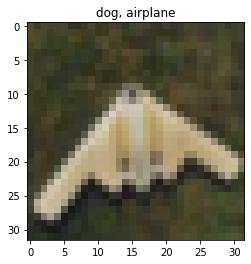

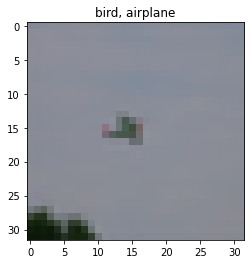

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


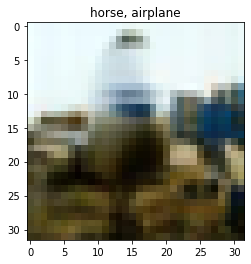

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


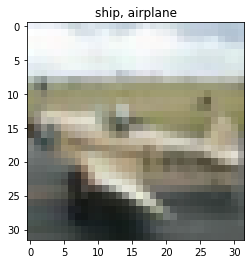

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


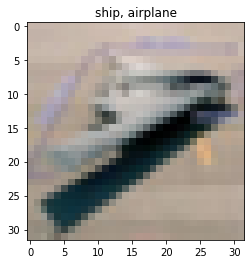

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


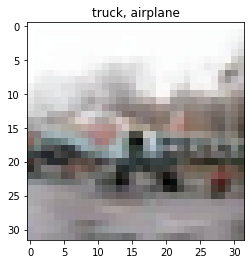

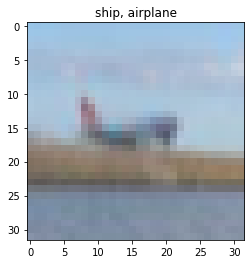

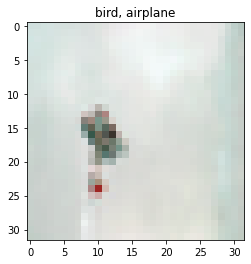

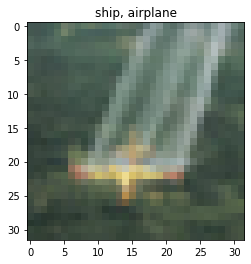

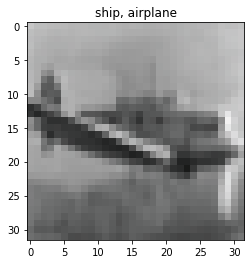

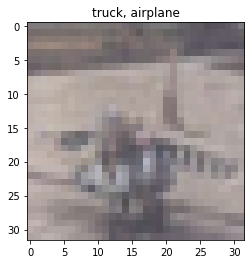

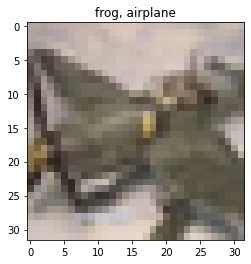

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


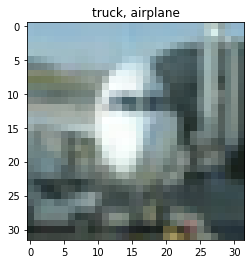

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


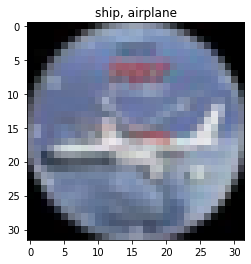

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


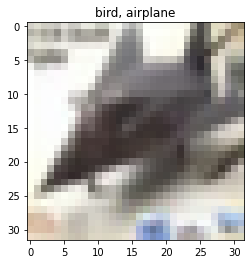

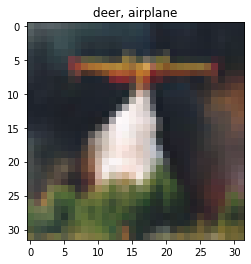

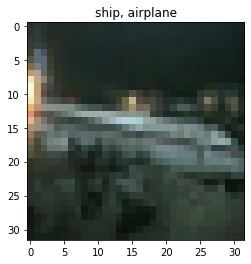

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


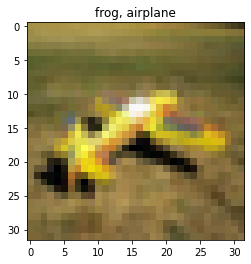

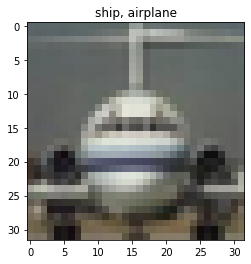

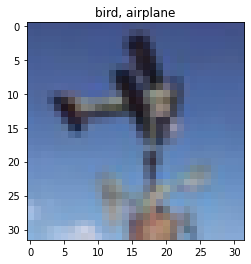

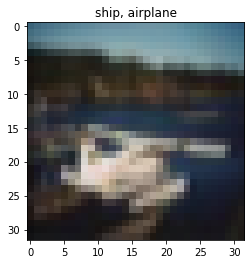

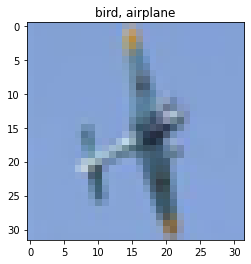

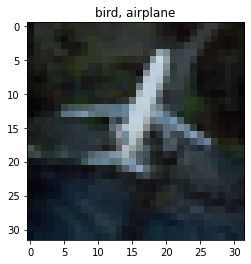

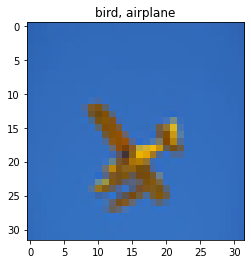

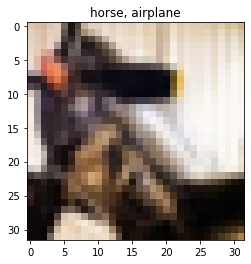

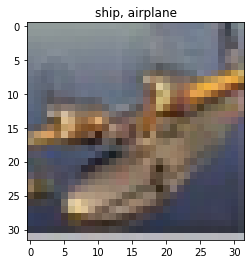

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


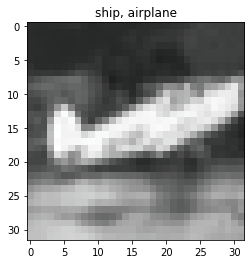

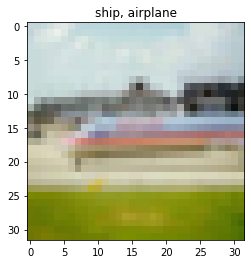

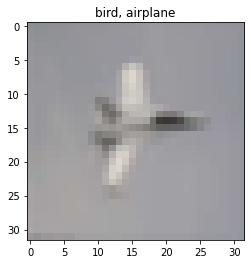

KeyboardInterrupt: 

In [28]:
for img, predict, label in zip(res, false_predicts, true_labels):
    
    if label == 0:
        a = img.cpu()
        b = a.numpy().transpose(1,2,0)
        c = b*std+mean
        plt.imshow(c)
        plt.title(f'{classes[predict]}, {classes[label]}')
        plt.show()

In [85]:
a.shape

torch.Size([3, 32, 32])

In [86]:
c = np.transpose(a, (1, 2, 0))

In [88]:
c = c.numpy()

In [89]:
c.shape

(32, 32, 3)

In [94]:
(c * std + mean).shape

(32, 32, 3)

In [90]:
img.shape

torch.Size([5, 3, 32, 32])

In [91]:
i1, p1, l1 = res[0]
i2, p2, l2 = res[1]

In [92]:
i1.shape

torch.Size([5, 3, 32, 32])

In [93]:
i2.shape

torch.Size([6, 3, 32, 32])

In [95]:
torch.cat([i1, i2]).shape

torch.Size([11, 3, 32, 32])

In [100]:
res.shape

torch.Size([1222, 3, 32, 32])

In [101]:
len(false_label)

313

In [102]:
1222/313

3.9041533546325877

In [27]:
img, label, fnames = next(iter(dataloader_test))

In [28]:
img.shape

torch.Size([32, 3, 32, 32])

In [29]:
img = img.to(device)

In [36]:
emb = moco(img)

In [61]:
false = img[torch.argmax(emb, dim=1).cpu() != label]

In [66]:
torch.argmax(emb, dim=1).cpu()[torch.argmax(emb, dim=1).cpu() != label]

tensor([5, 2, 7, 8, 8])

In [67]:
predict = torch.argmax(emb, dim=1).cpu()

In [76]:
import pandas as pd

KeyError: tensor([False, False, False, False, False,  True, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False,  True,  True, False,
        False, False])

In [74]:
[predict != label]

[tensor([False, False, False, False, False,  True, False, False,  True, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False,  True, False, False, False,  True,  True, False,
         False, False])]

In [71]:
fnames[1]

'airplane\\0002.png'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


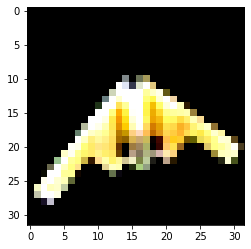

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


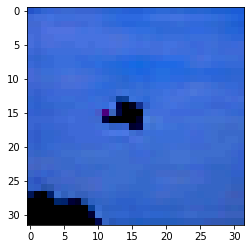

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


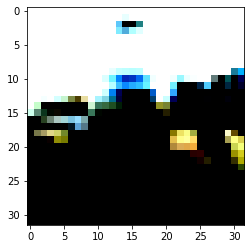

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


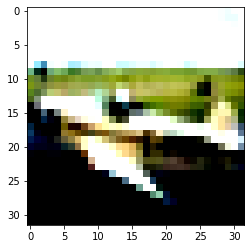

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


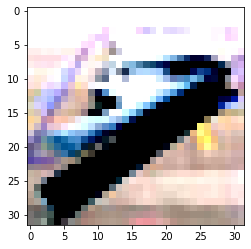

In [63]:
for im in false:
    a = im.cpu()
    b = a.numpy()
    plt.imshow(np.transpose(b, (1, 2, 0)))
    plt.show()
    

In [40]:
label

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])